[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/edting/historical-price-analysis/blob/master/analysis.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mpl_dates
import yfinance as yf
from python import functions
from python import utils

In [2]:
# Get historical data using yfinance API
ticker = yf.Ticker("VGS.AX")
vgs = ticker.history(period='1y', interval='1d')

# Extract information from the dataframe
date = vgs.index
open_price = vgs['Open'].to_numpy()
close_price = vgs['Close'].to_numpy()
max_price = vgs['High'].to_numpy()
min_price = vgs['Low'].to_numpy()
volume = vgs['Volume'].to_numpy()
change = np.array(100*(close_price[1:]-close_price[:-1])/close_price[:-1])
fluctuation = max_price - min_price
fluctuation_end = close_price - open_price
fluctuation_ratio = abs(fluctuation_end[fluctuation!=0])/fluctuation[fluctuation!=0]

# Plot

In [3]:
# Load the plot style
utils.set_plot_style()

# Legend text for indicating the date range being visualised (if needed)
daterange = f"{str(date[0])[:10]} to {str(date[-1])[:10]}"

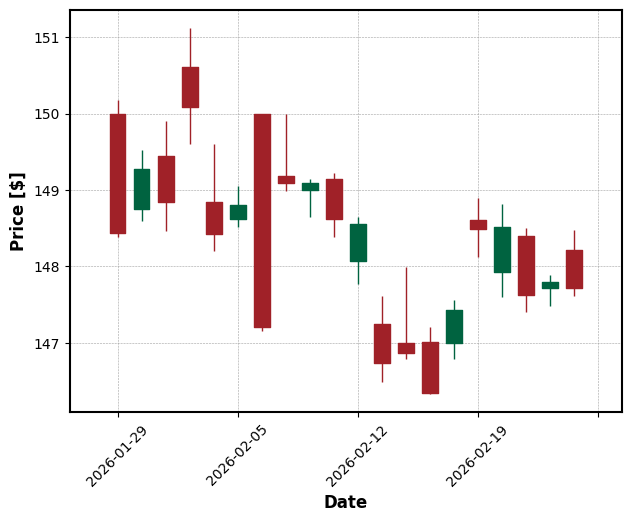

In [4]:
# Candlestick plot (plus moving averages, if specified)
days = 20
utils.plot_candle(vgs[-days:], style='charles', datetime_format='%Y-%m-%d')
utils.save("candle", show=True)
utils.set_plot_style() # candle plot overwrites the plot style, so reset it

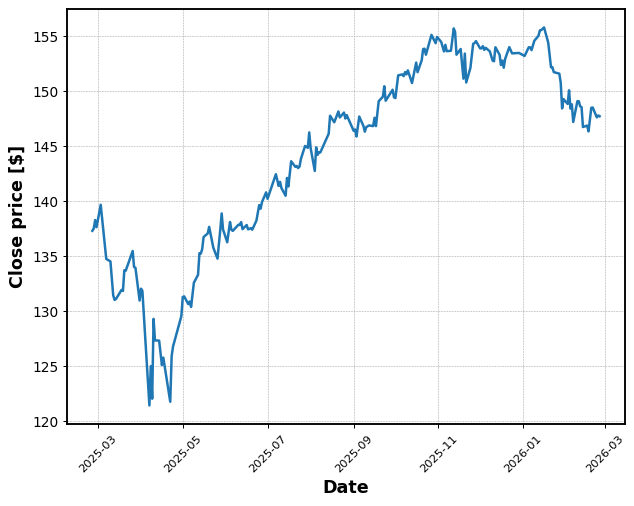

In [5]:
# Closing price (time series)
utils.plot_line(date, close_price, xlabel="Date", ylabel="Close price [$]")
utils.save("price", show=True)

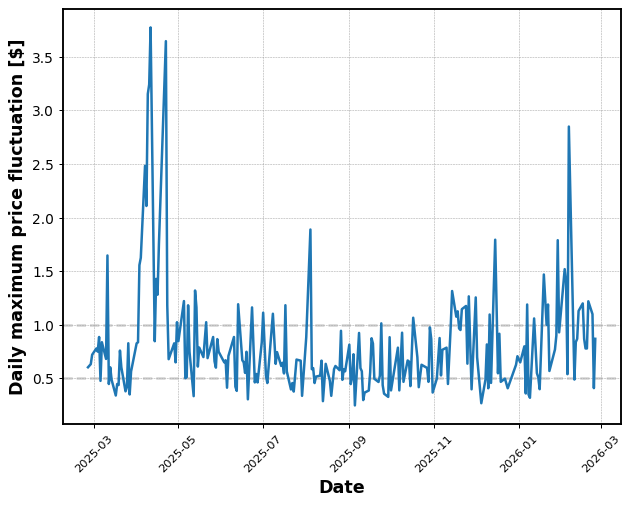

In [6]:
# Daily maximum fluctuation (time series)
utils.plot_line(date, fluctuation, xlabel="Date", ylabel="Daily maximum price fluctuation [$]", horizontal=[0.5,1])
utils.save("day_range", show=True)

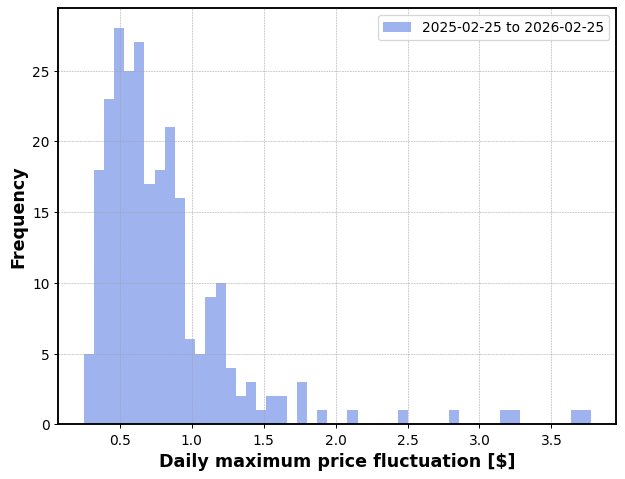

In [7]:
# Daily maximum fluctuation (histogram)
utils.plot_hist(fluctuation, xlabel="Daily maximum price fluctuation [$]", legend=daterange)
utils.save("day_range_binned", show=True)

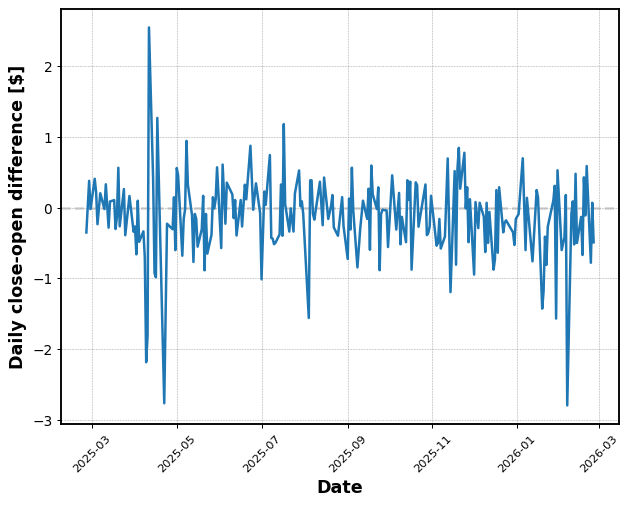

In [8]:
# Daily open minus close (time series)
utils.plot_line(date, fluctuation_end, xlabel="Date", ylabel="Daily close-open difference [$]", horizontal=[0])
utils.save("close_minus_open", show=True)

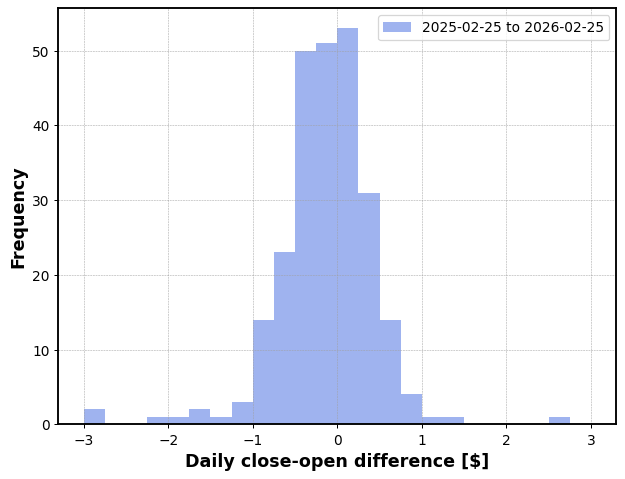

In [9]:
# Daily close minus open (histogram)
utils.plot_hist(fluctuation_end, axisrange=(-3,3), nbins=24, xlabel="Daily close-open difference [$]", legend=daterange)
utils.save("close_minus_open_binned", show=True)

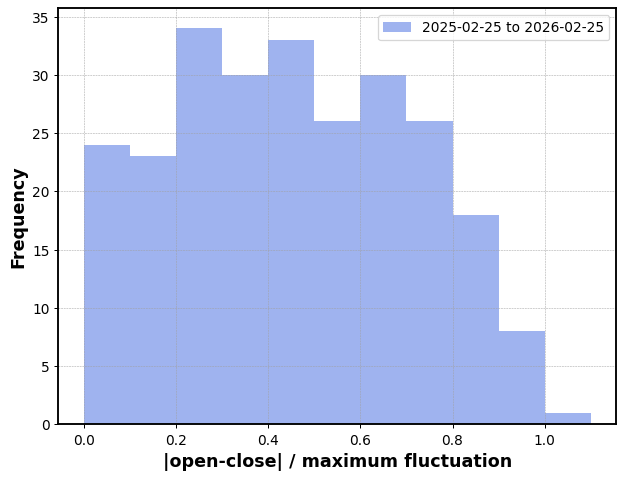

In [10]:
# Ratio of daily end-to-end fluctuation to the maximum fluctuation
utils.plot_hist(fluctuation_ratio, axisrange=(0,1.1), nbins=11, xlabel="|open-close| / maximum fluctuation", legend=daterange)
utils.save("fluctuation_ratio", show=True)

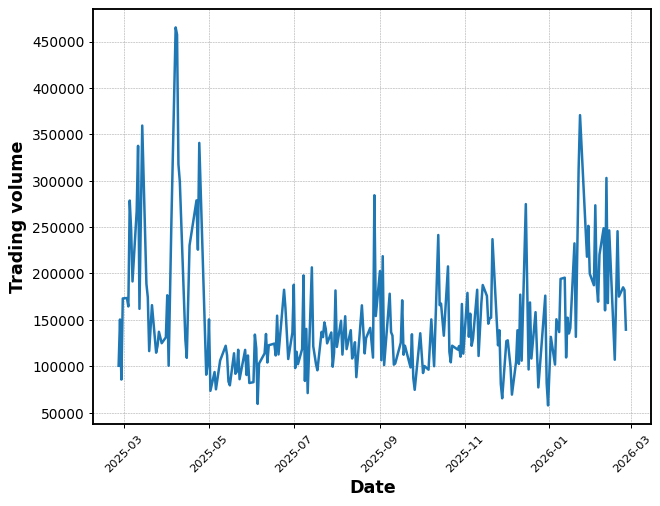

In [11]:
# Trading volume (time series)
utils.plot_line(date, volume, xlabel="Date", ylabel="Trading volume")
utils.save("volume", show=True)

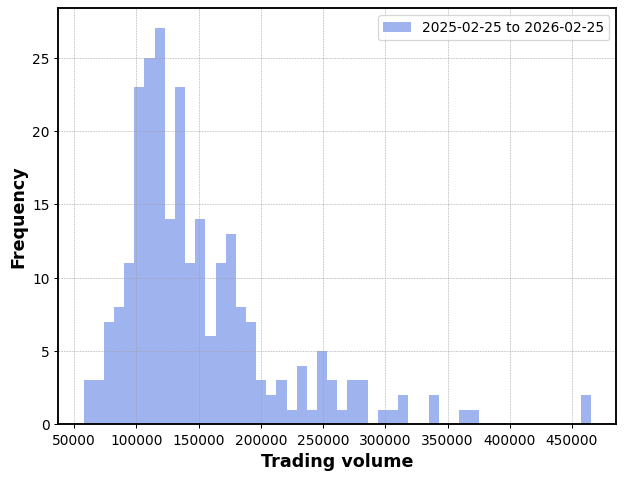

In [12]:
# Trading volume (hist)
utils.plot_hist(volume, xlabel="Trading volume", legend=daterange)
utils.save("volume_binned", show=True)

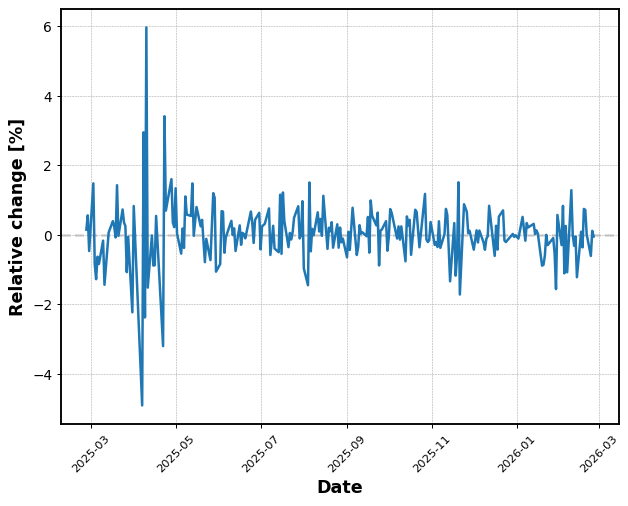

In [13]:
# Daily relative change
utils.plot_line(date[1:], change, xlabel="Date", ylabel="Relative change [%]", horizontal=[0])
utils.save("change", show=True)

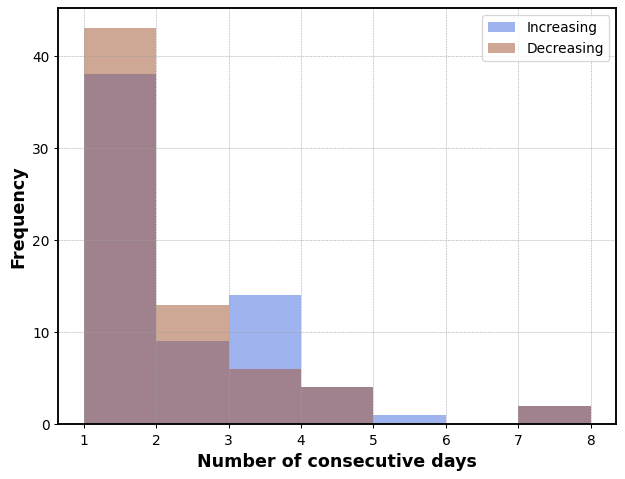

In [14]:
# Number of consecutive days that the closing price increased or decreased
n_consec_incr, n_consec_decr, slope_incr, slope_decr = functions.consecutive_movement(close_price)
xmin = min( min(n_consec_incr), min(n_consec_decr) )
xmax = max( max(n_consec_incr), max(n_consec_decr) )
nbins = xmax - xmin
utils.plot_hist(n_consec_incr, axisrange=(xmin,xmax), nbins=nbins, xlabel="Number of consecutive days", legend="Increasing")
utils.plot_hist(n_consec_decr, axisrange=(xmin,xmax), nbins=nbins, color="sienna", xlabel="", legend="Decreasing")
utils.save("consecutive_days", show=True)

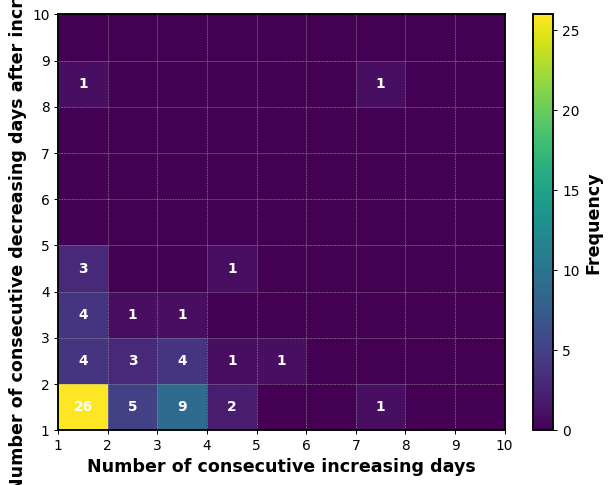

In [15]:
# 2D histogram showing the "momentum" of a flip, corresponding to how many
# consecutively decreasing days occur immediately after each period of consecutive increases
while len(n_consec_incr) > len(n_consec_decr):
    n_consec_incr = n_consec_incr[:-1]
utils.plot_hist2d(n_consec_incr,
                  n_consec_decr,
                  xlabel = "Number of consecutive increasing days", 
                  ylabel = "Number of consecutive decreasing days after increase", 
                  zlabel = "Frequency", 
                  text = True,
                  range = [[1,10],[1,10]], 
                  bins = 9 )
utils.save("flip_momentum", show=True)

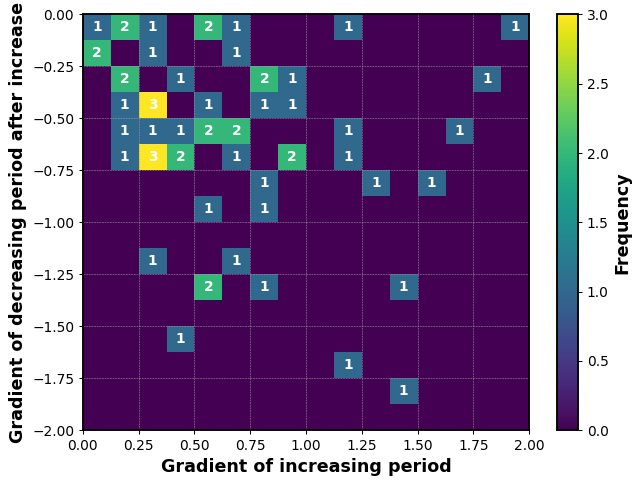

In [16]:
# 2D histogram showing slopes of successive increasing -> decreasing periods
utils.plot_hist2d(slope_incr,
                  slope_decr,
                  xlabel = "Gradient of increasing period", 
                  ylabel = "Gradient of decreasing period after increase", 
                  zlabel = "Frequency", 
                  text=True, 
                  range = [[0,2],[-2,0]], 
                  bins = 16 )
utils.save("flip_strength", show=True)

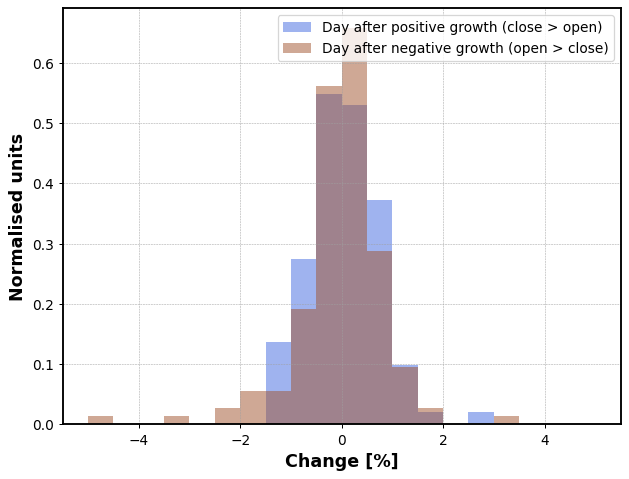

In [17]:
# Plot change [%] for the day following one where open > close, and where close > open
following_negative_change = [ val for i,val in enumerate(change[1:]) if open_price[i-1] > close_price[i-1] ]
following_positive_change = [ val for i,val in enumerate(change[1:]) if open_price[i-1] < close_price[i-1] ]
utils.plot_hist(following_positive_change, axisrange=(-5,5), nbins=20, density=True, xlabel="Change [%]", ylabel="Normalised units", legend="Day after positive growth (close > open)")
utils.plot_hist(following_negative_change, axisrange=(-5,5), nbins=20, density=True, color="sienna", xlabel="", ylabel="", legend="Day after negative growth (open > close)")
utils.save("following_day_change", show=True)

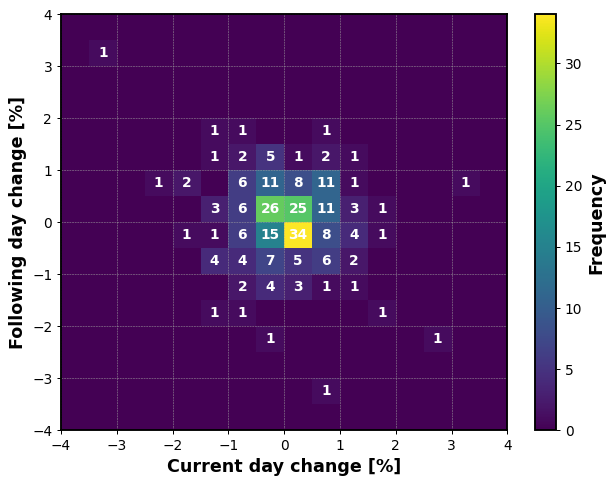

In [18]:
# Plot change [%] for the following day against the change [%] of the current day
utils.plot_hist2d(change[:-1],
                  change[1:],
                  xlabel = "Current day change [%]", 
                  ylabel = "Following day change [%]", 
                  zlabel = "Frequency", 
                  text=True, 
                  range = [[-4,4],[-4,4]], 
                  bins = 16 )
utils.save("consecutive_change_2d", show=True)